In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path=("C:\\Users\\shrav\\Downloads\\test_lAUu6dG.csv")
test_df=pd.read_csv(file_path)
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
test_df.replace({"3+":"4"})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
# seperate categorical and numerical columns
num=test_df.select_dtypes(include=['number']).columns
cat=test_df.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')
num: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [5]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
test_df[num]=test_df[num].fillna(test_df[num].median())

In [7]:
test_df[cat]=test_df[cat].fillna(test_df[cat].mode().iloc[0])

In [8]:
test_df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [9]:
for i in cat:
    a=test_df[i].unique()
    print(i,a)

Loan_ID ['LP001015' 'LP001022' 'LP001031' 'LP001035' 'LP001051' 'LP001054'
 'LP001055' 'LP001056' 'LP001059' 'LP001067' 'LP001078' 'LP001082'
 'LP001083' 'LP001094' 'LP001096' 'LP001099' 'LP001105' 'LP001107'
 'LP001108' 'LP001115' 'LP001121' 'LP001124' 'LP001128' 'LP001135'
 'LP001149' 'LP001153' 'LP001163' 'LP001169' 'LP001174' 'LP001176'
 'LP001177' 'LP001183' 'LP001185' 'LP001187' 'LP001190' 'LP001203'
 'LP001208' 'LP001210' 'LP001211' 'LP001219' 'LP001220' 'LP001221'
 'LP001226' 'LP001230' 'LP001231' 'LP001232' 'LP001237' 'LP001242'
 'LP001268' 'LP001270' 'LP001284' 'LP001287' 'LP001291' 'LP001298'
 'LP001312' 'LP001313' 'LP001317' 'LP001321' 'LP001323' 'LP001324'
 'LP001332' 'LP001335' 'LP001338' 'LP001347' 'LP001348' 'LP001351'
 'LP001352' 'LP001358' 'LP001359' 'LP001361' 'LP001366' 'LP001368'
 'LP001375' 'LP001380' 'LP001386' 'LP001400' 'LP001407' 'LP001413'
 'LP001415' 'LP001419' 'LP001420' 'LP001428' 'LP001445' 'LP001446'
 'LP001450' 'LP001452' 'LP001455' 'LP001466' 'LP001471

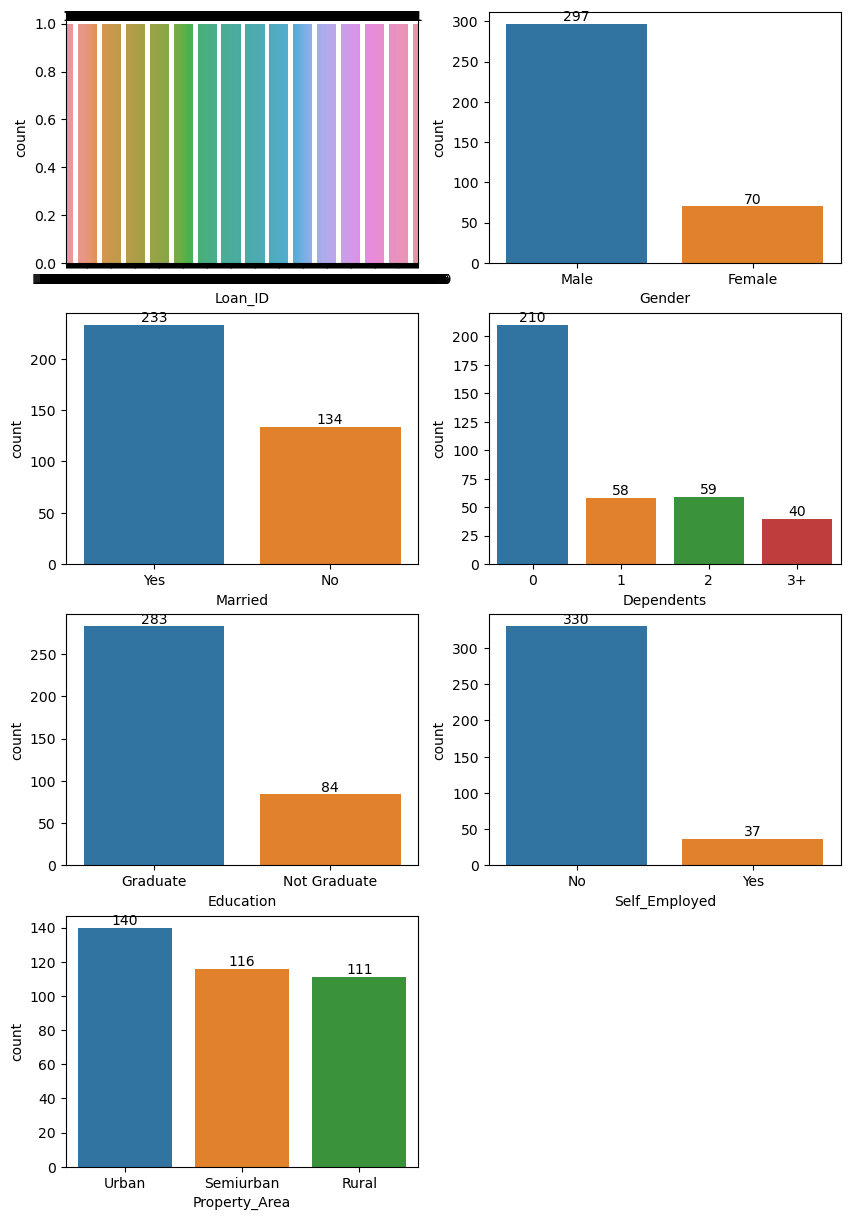

In [10]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)

    ax=sns.countplot(data=test_df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

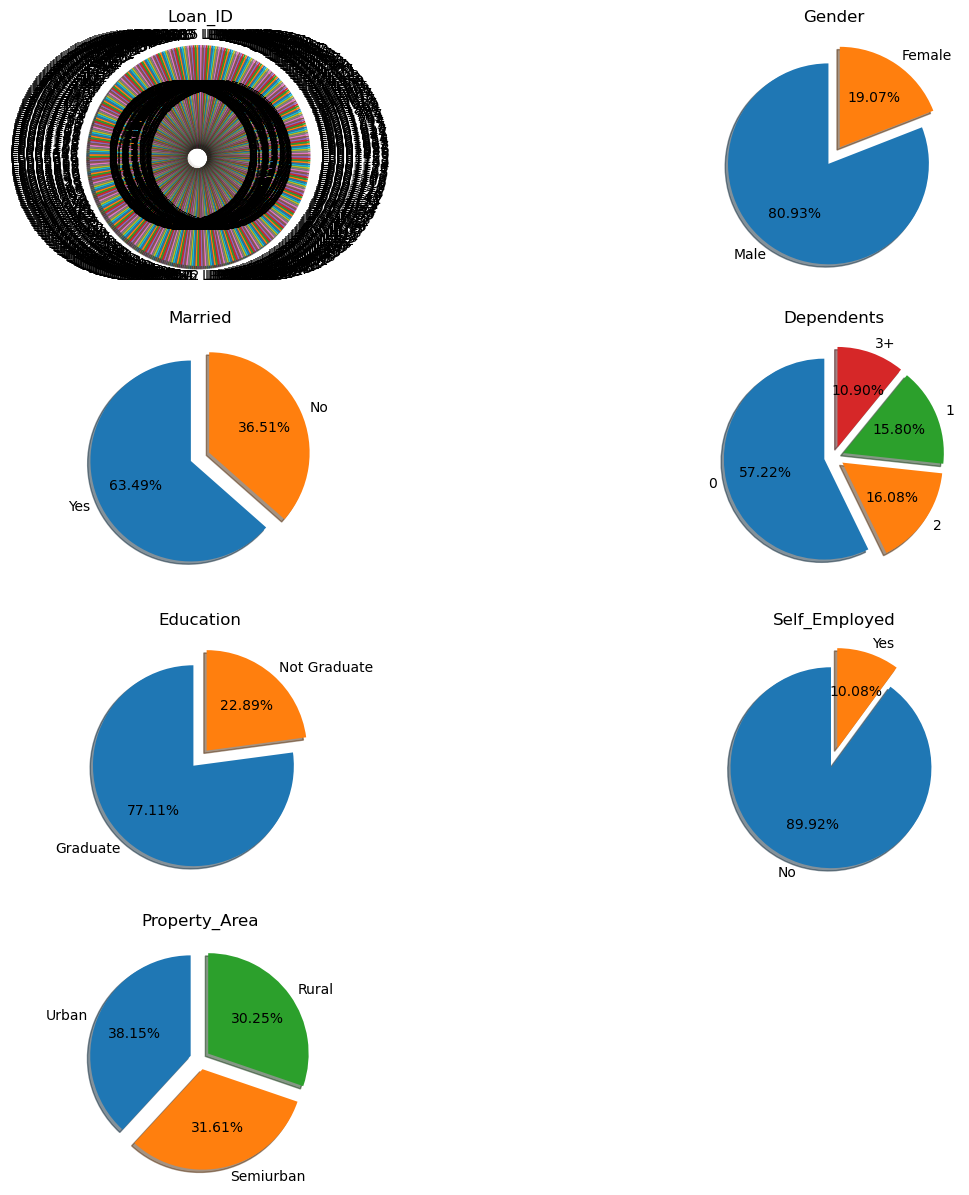

In [11]:
plt.figure(figsize=(15,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)
    test_df[column].value_counts()
    Property=test_df[column].value_counts(normalize=True).keys()
    count=test_df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=test_df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

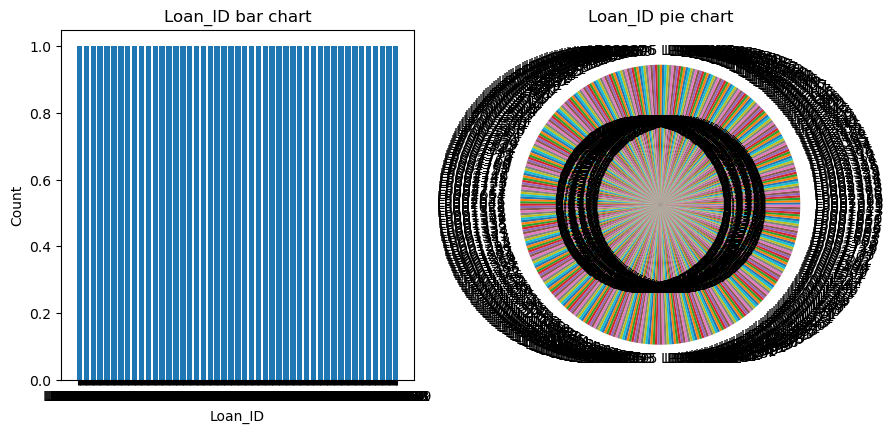

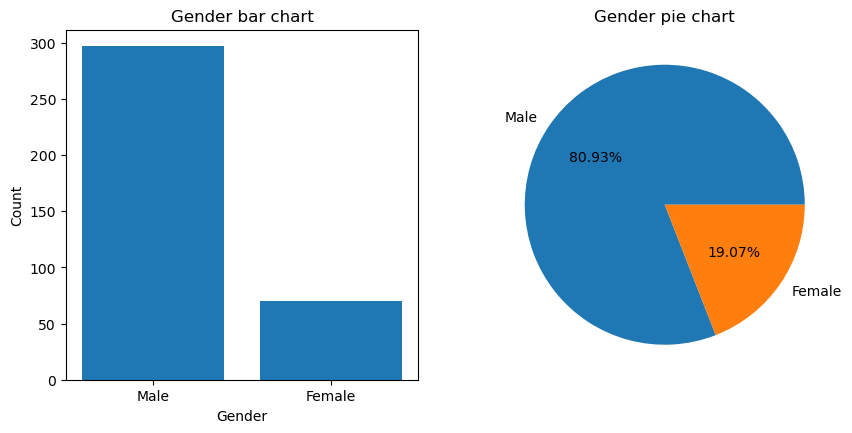

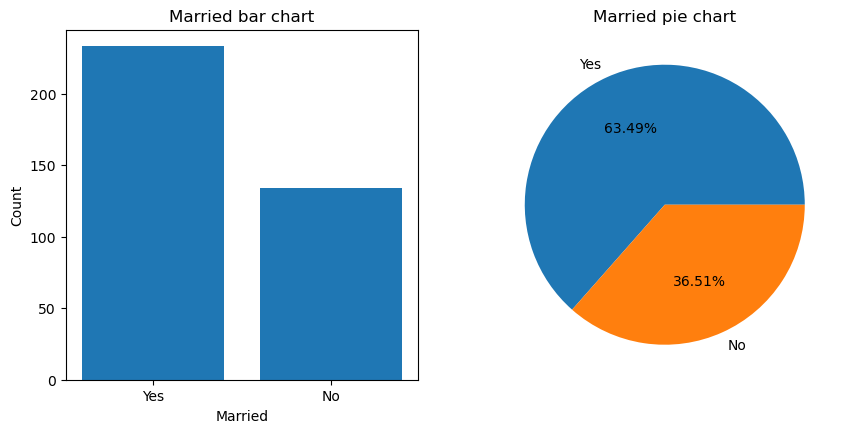

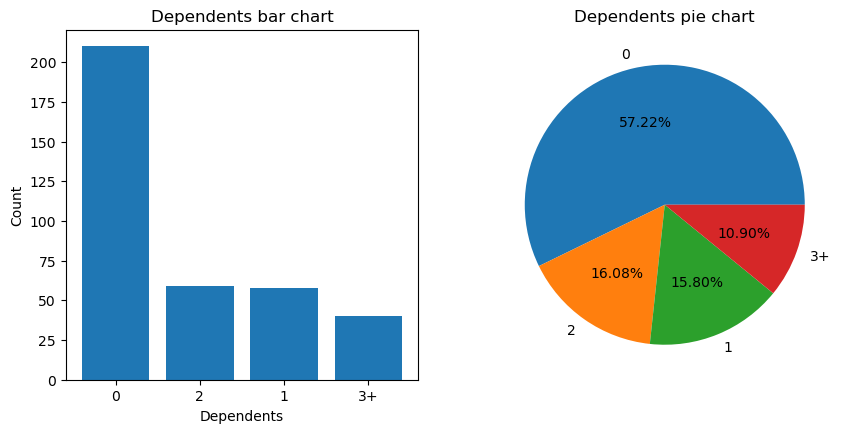

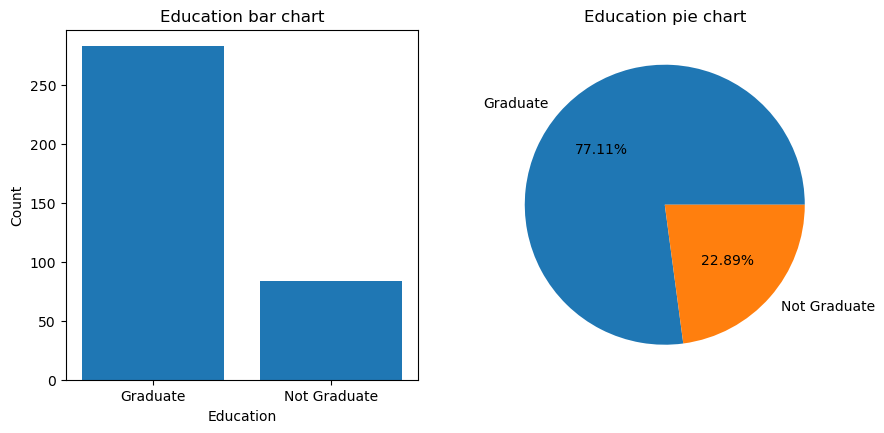

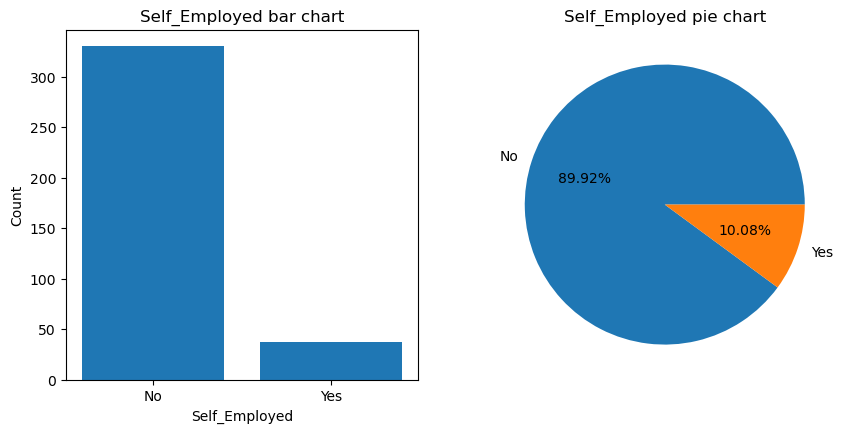

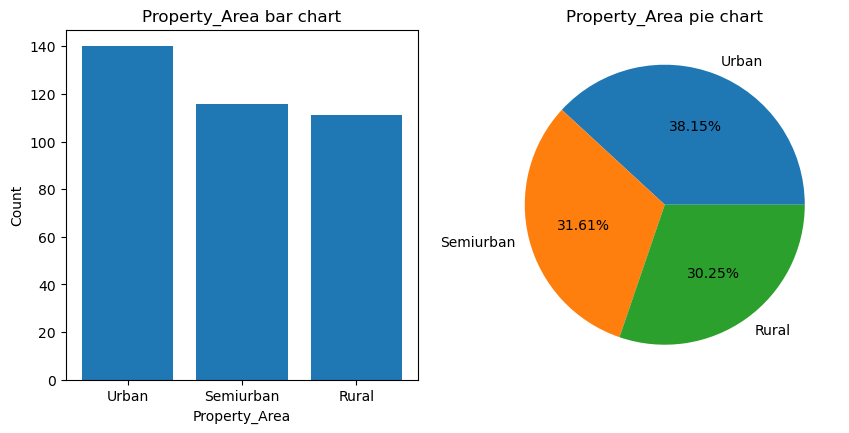

In [12]:
for column in cat:
    
    test_df[column].value_counts()
    Property=test_df[column].value_counts().keys()
    count=test_df[column].value_counts().values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    Data
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title(f'{column} bar chart')
    plt.bar(column,'Count',data=Data)
    
    plt.xlabel(column)
    plt.ylabel('Count')
    
   
    plt.subplot(2,2,2)
    plt.title(f'{column} pie chart')
    plt.pie(x=count,labels=Property,autopct='%0.2f%%')
    
    plt.show()


In [13]:
for i in num:
    d_count=round(test_df[i].count(),2)
    d_max=round(test_df[i].max(),2)
    d_min=round(test_df[i].min(),2)
    d_mean=round(test_df[i].mean(),2)
    d_median=round(test_df[i].median(),2)
    d_std=round(test_df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

ApplicantIncome count: 367
ApplicantIncome max: 72529
ApplicantIncome min: 0
ApplicantIncome mean: 4805.6
ApplicantIncome median: 3786.0
ApplicantIncome std: 4910.69
------------------------------------
CoapplicantIncome count: 367
CoapplicantIncome max: 24000
CoapplicantIncome min: 0
CoapplicantIncome mean: 1569.58
CoapplicantIncome median: 1025.0
CoapplicantIncome std: 2334.23
------------------------------------
LoanAmount count: 367
LoanAmount max: 550.0
LoanAmount min: 28.0
LoanAmount mean: 135.98
LoanAmount median: 125.0
LoanAmount std: 60.96
------------------------------------
Loan_Amount_Term count: 367
Loan_Amount_Term max: 480.0
Loan_Amount_Term min: 6.0
Loan_Amount_Term mean: 342.82
Loan_Amount_Term median: 360.0
Loan_Amount_Term std: 64.66
------------------------------------
Credit_History count: 367
Credit_History max: 1.0
Credit_History min: 0.0
Credit_History mean: 0.84
Credit_History median: 1.0
Credit_History std: 0.37
------------------------------------


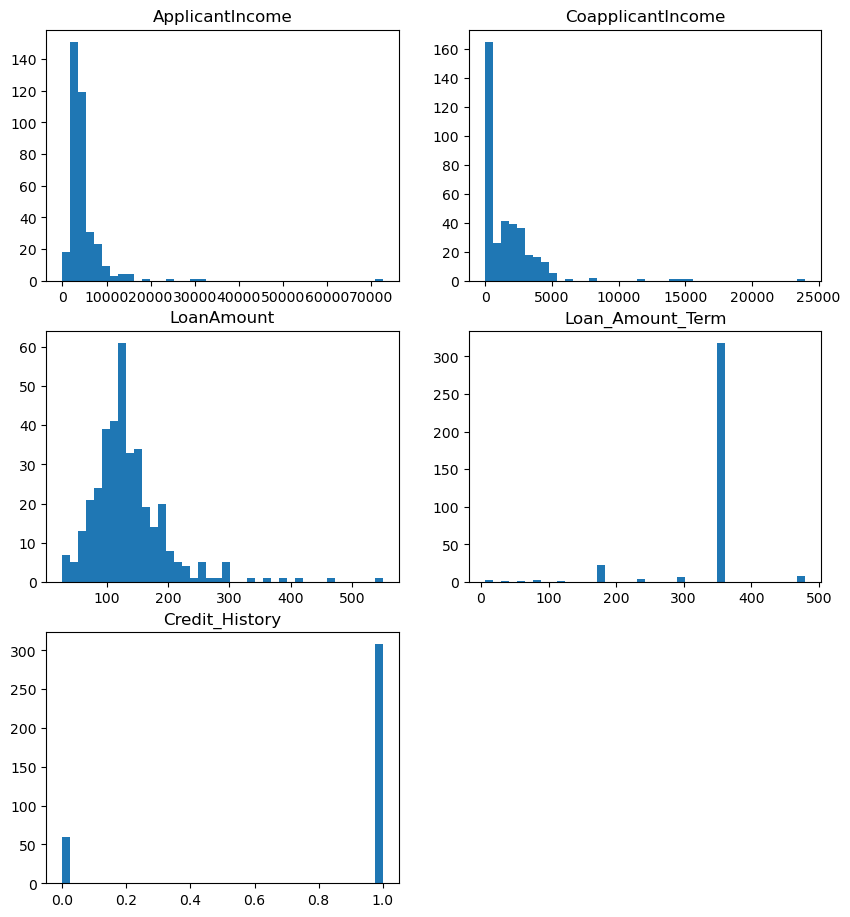

In [14]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(test_df[column],bins=40)
plt.show()

In [15]:
mean=test_df['ApplicantIncome'].mean()
std=test_df['ApplicantIncome'].std()

In [16]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=test_df['ApplicantIncome']>val_minus_1
con2=test_df['ApplicantIncome']<val_plus_1

ep1=len(test_df[con1&con2])
ep2=ep1/len(test_df)

con3=test_df['ApplicantIncome']>val_minus_2
con4=test_df['ApplicantIncome']<val_plus_2

ep3=len(test_df[con3&con4])
ep4=ep3/len(test_df)

con5=test_df['ApplicantIncome']>val_minus_3
con6=test_df['ApplicantIncome']<val_plus_3
ep5=len(test_df[con3&con4])
ep6=ep5/len(test_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.9427792915531336
ep2: 0.9754768392370572
ep3: 0.9754768392370572


In [17]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=test_df['CoapplicantIncome']>val_minus_1
con2=test_df['CoapplicantIncome']<val_plus_1

ep1=len(test_df[con1&con2])
ep2=ep1/len(test_df)

con3=test_df['CoapplicantIncome']>val_minus_2
con4=test_df['CoapplicantIncome']<val_plus_2

ep3=len(test_df[con3&con4])
ep4=ep3/len(test_df)

con5=test_df['CoapplicantIncome']>val_minus_3
con6=test_df['CoapplicantIncome']<val_plus_3
ep5=len(test_df[con3&con4])
ep6=ep5/len(test_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.9863760217983651
ep2: 0.9945504087193461
ep3: 0.9945504087193461


In [18]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=test_df['LoanAmount']>val_minus_1
con2=test_df['LoanAmount']<val_plus_1

ep1=len(test_df[con1&con2])
ep2=ep1/len(test_df)

con3=test_df['LoanAmount']>val_minus_2
con4=test_df['LoanAmount']<val_plus_2

ep3=len(test_df[con3&con4])
ep4=ep3/len(test_df)

con5=test_df['LoanAmount']>val_minus_3
con6=test_df['LoanAmount']<val_plus_3
ep5=len(test_df[con3&con4])
ep6=ep5/len(test_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [19]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=test_df['Credit_History']>val_minus_1
con2=test_df['Credit_History']<val_plus_1

ep1=len(test_df[con1&con2])
ep2=ep1/len(test_df)

con3=test_df['Credit_History']>val_minus_2
con4=test_df['Credit_History']<val_plus_2

ep3=len(test_df[con3&con4])
ep4=ep3/len(test_df)

con5=test_df['Credit_History']>val_minus_3
con6=test_df['Credit_History']<val_plus_3
ep5=len(test_df[con3&con4])
ep6=ep5/len(test_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


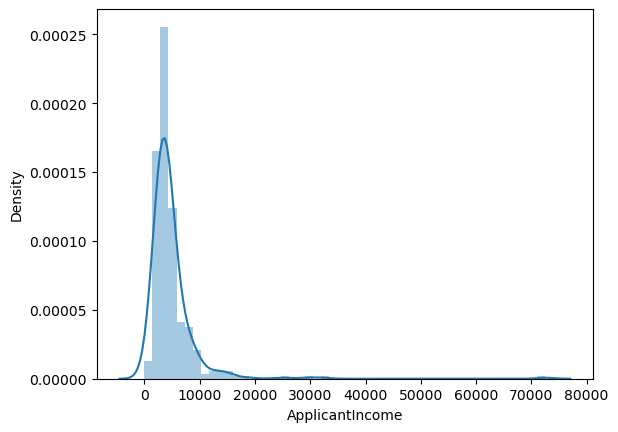

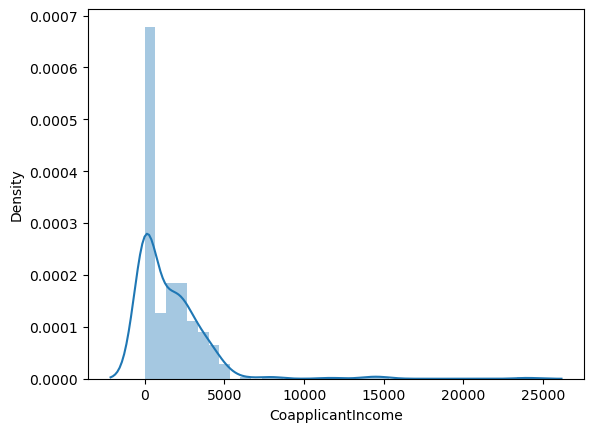

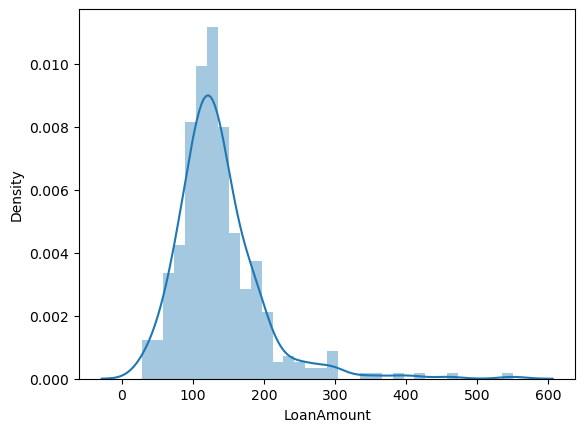

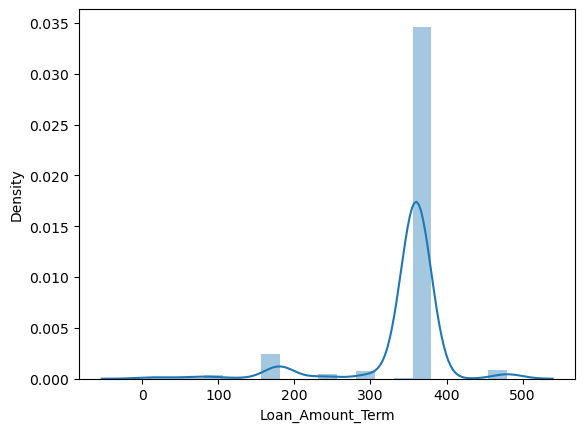

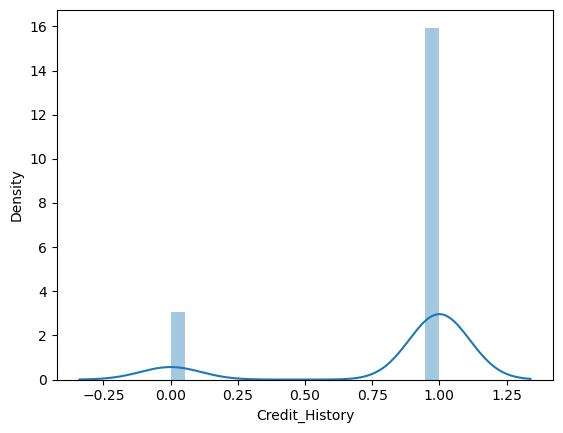

In [20]:
for i in num:
    sns.distplot(test_df[i])
    plt.show()

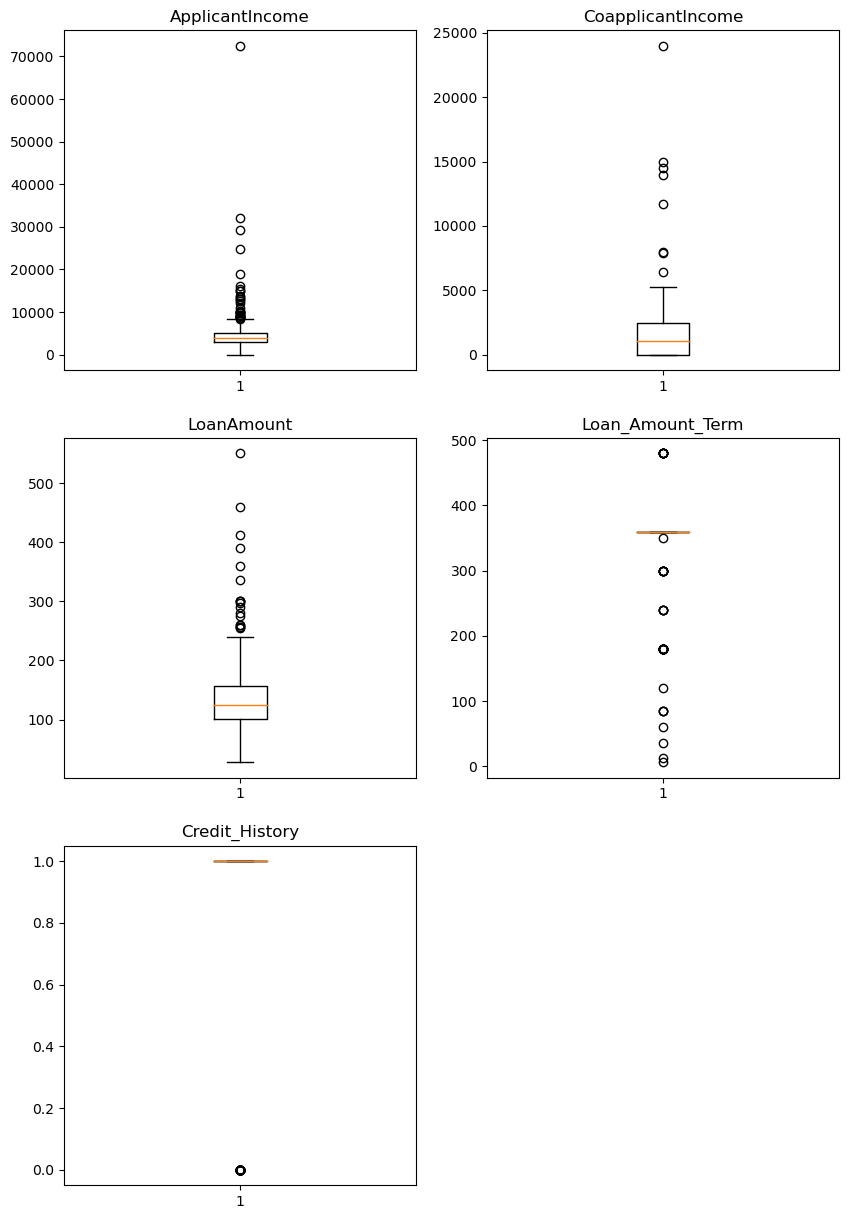

In [21]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(test_df[column])
plt.show()

In [22]:
q1=np.quantile(test_df['ApplicantIncome'],0.25)
q2=np.quantile(test_df['ApplicantIncome'],0.50)
q3=np.quantile(test_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=test_df['ApplicantIncome']>ub1
con2=test_df['ApplicantIncome']<lb1
outlier=test_df[con1|con2]
len(outlier)

32

In [23]:
q1=np.quantile(test_df['ApplicantIncome'],0.25)
q2=np.quantile(test_df['ApplicantIncome'],0.50)
q3=np.quantile(test_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=test_df['ApplicantIncome']<ub1
con2=test_df['ApplicantIncome']>lb1
non_outlier=test_df[con1&con2]
len(non_outlier)

335

In [24]:
q1=np.quantile(test_df['CoapplicantIncome'],0.25)
q2=np.quantile(test_df['CoapplicantIncome'],0.50)
q3=np.quantile(test_df['CoapplicantIncome'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=test_df['CoapplicantIncome']>ub2
con2=test_df['CoapplicantIncome']<lb2
outlier=test_df[con1|con2]
len(outlier)


8

In [25]:
q1=np.quantile(test_df['CoapplicantIncome'],0.25)
q2=np.quantile(test_df['CoapplicantIncome'],0.50)
q3=np.quantile(test_df['CoapplicantIncome'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=test_df['CoapplicantIncome']<ub2
con2=test_df['CoapplicantIncome']>lb2
non_outlier=test_df[con1&con2]
len(non_outlier)

359

In [26]:
q1=np.quantile(test_df['LoanAmount'],0.25)
q2=np.quantile(test_df['LoanAmount'],0.50)
q3=np.quantile(test_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=test_df['LoanAmount']>ub3
con2=test_df['LoanAmount']<lb3
outlier=test_df[con1|con2]
len(outlier)


18

In [27]:
q1=np.quantile(test_df['LoanAmount'],0.25)
q2=np.quantile(test_df['LoanAmount'],0.50)
q3=np.quantile(test_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=test_df['LoanAmount']<ub3
con2=test_df['LoanAmount']>lb3
non_outlier=test_df[con1&con2]
len(non_outlier)

349

In [28]:
test_df["ApplicantIncome"]=np.clip(test_df['ApplicantIncome'],lb1,ub1)

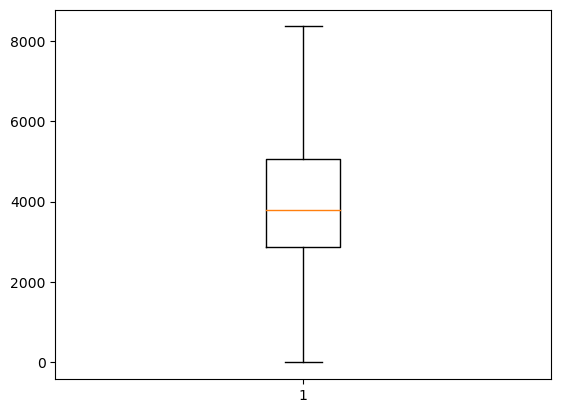

In [29]:
plt.boxplot(test_df['ApplicantIncome'])
plt.show()

In [30]:
test_df["CoapplicantIncome"]=np.clip(test_df['CoapplicantIncome'],lb2,ub2)

In [31]:
test_df["LoanAmount"]=np.clip(test_df['LoanAmount'],lb3,ub3)

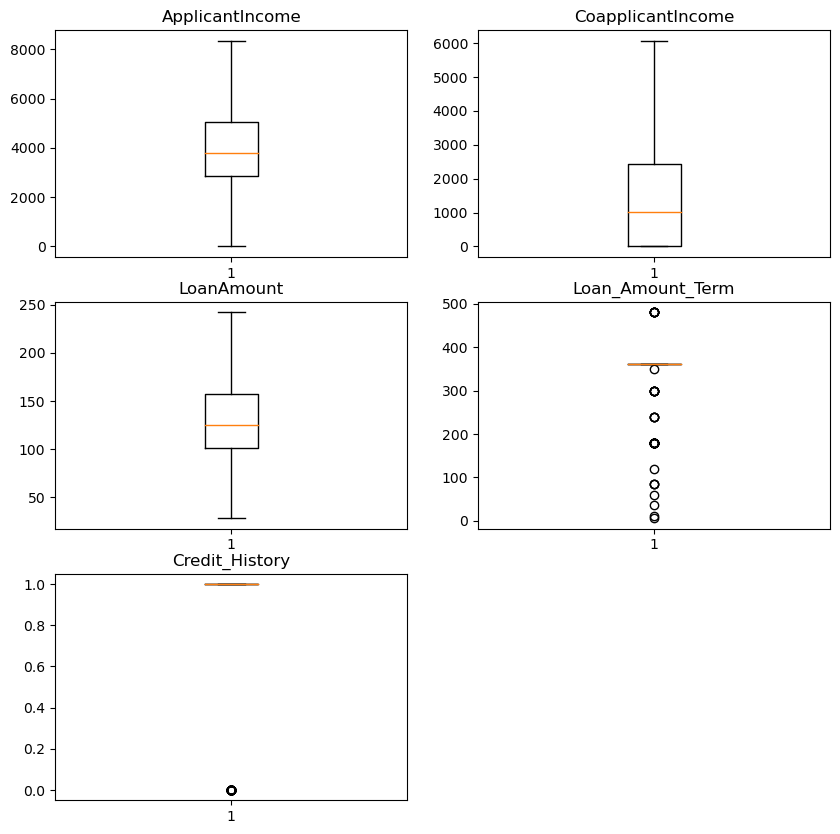

In [32]:
plt.figure(figsize=(10,10))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(test_df[column])
plt.show()

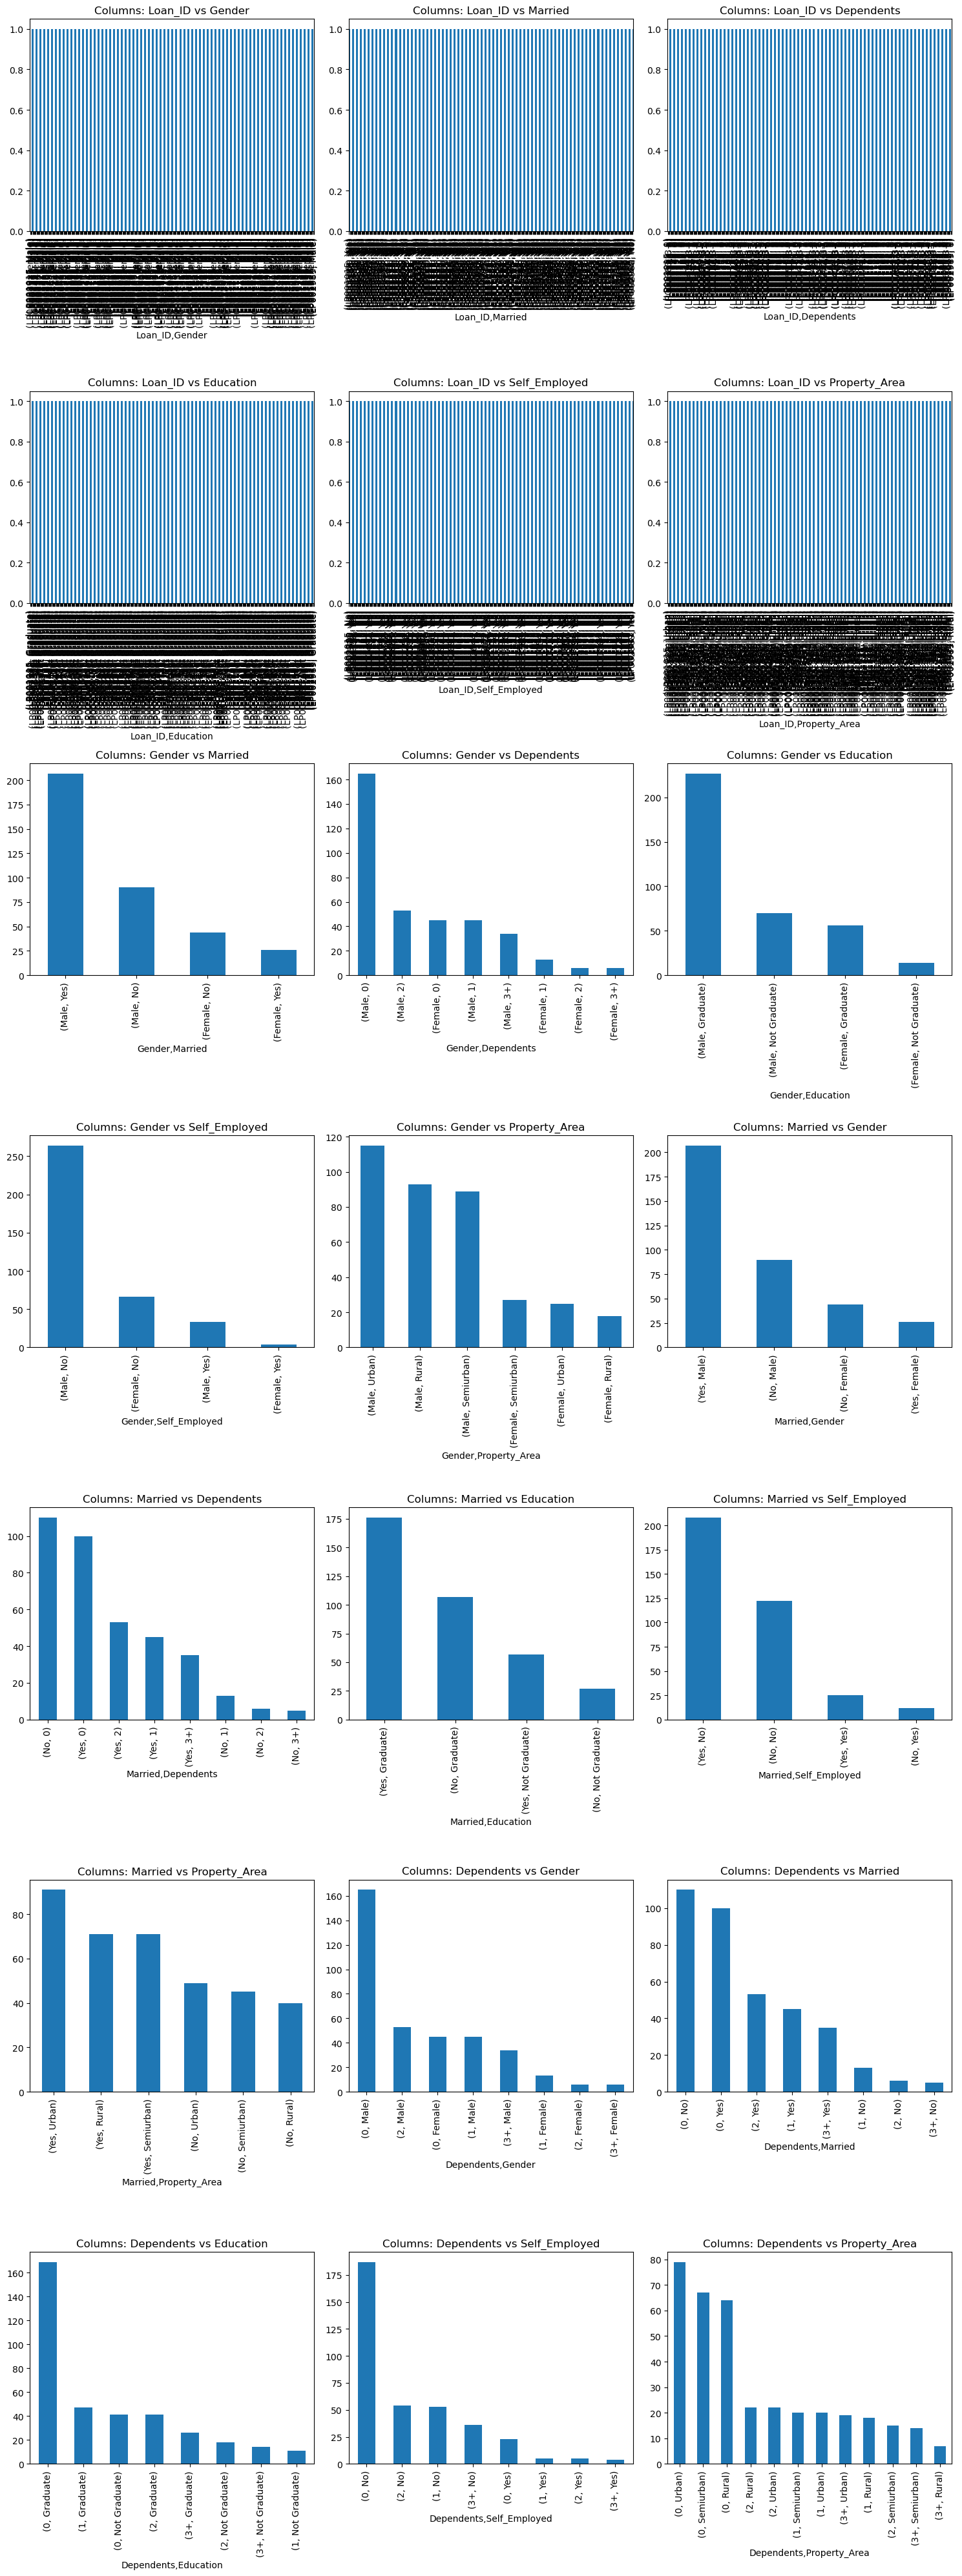

In [33]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 7 * 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 40))  # 9 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in cat:
    for j in cat[1:]:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 3, plot_counter % 3]  # Get the current subplot
            test_df[[i, j]].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

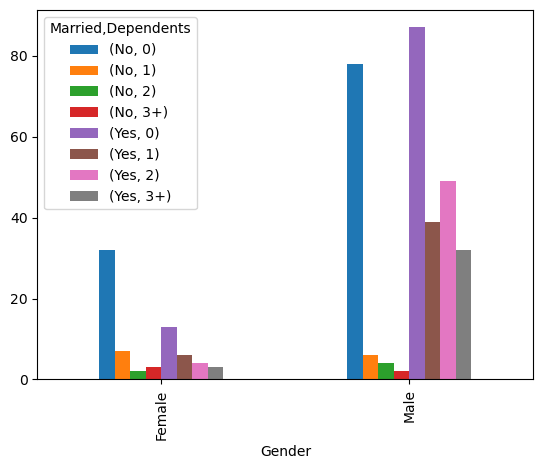

In [34]:
col1=test_df['Gender']
col2=test_df['Married']
col3=test_df['Dependents']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

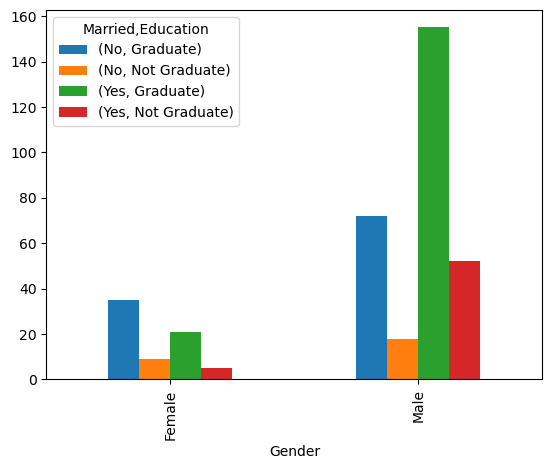

In [35]:
col1=test_df['Gender']
col2=test_df['Married']
col3=test_df['Education']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

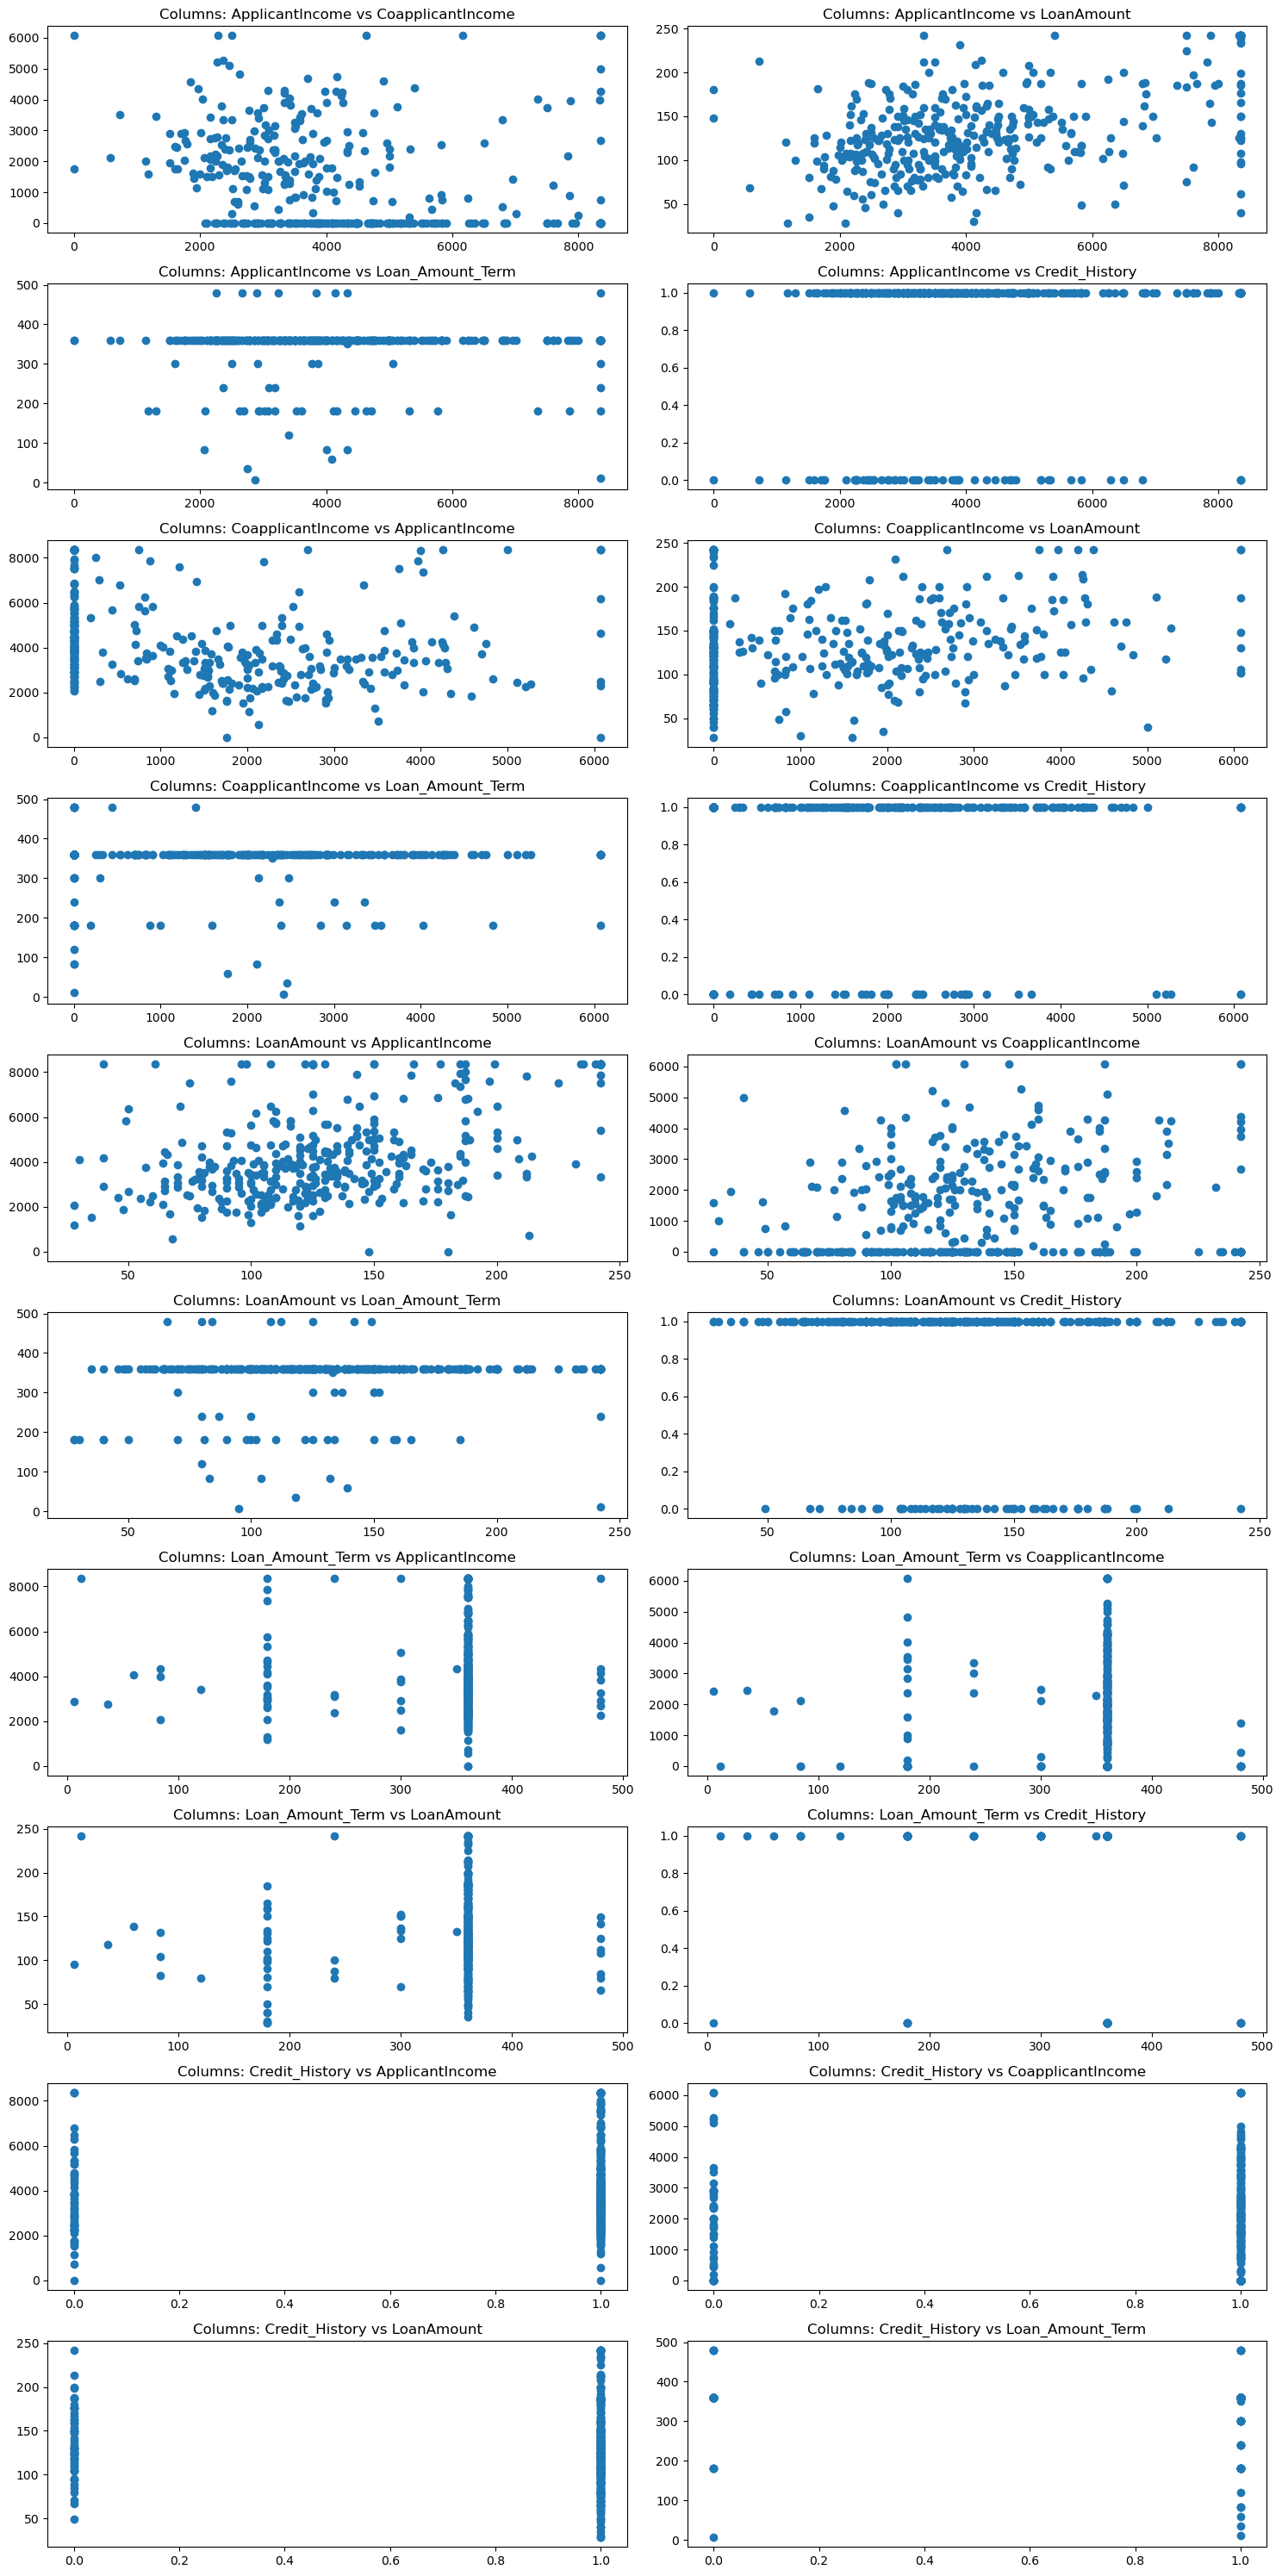

In [36]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 10 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(test_df[i], test_df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [37]:
corr=test_df.corr(numeric_only=True)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.253653,0.458722,0.022508,0.143344
CoapplicantIncome,-0.253653,1.000000,0.194046,-0.027435,-0.039303
LoanAmount,0.458722,0.194046,1.000000,0.106143,-0.045232
Loan_Amount_Term,0.022508,-0.027435,0.106143,1.000000,-0.048189
Credit_History,0.143344,-0.039303,-0.045232,-0.048189,1.000000


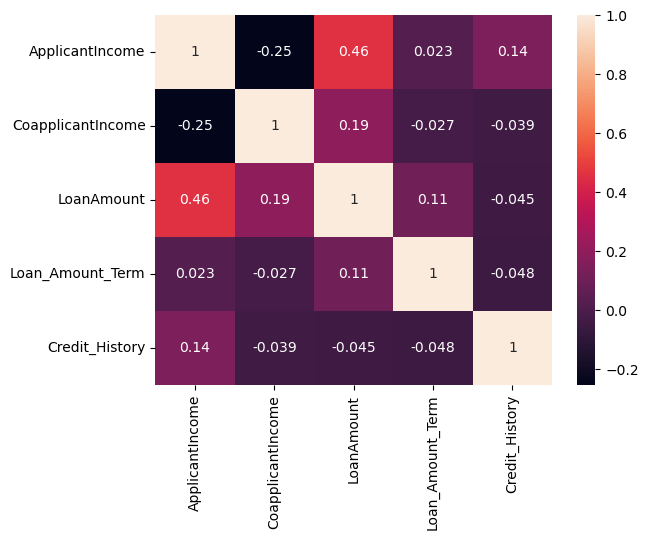

In [38]:
sns.heatmap(corr,annot=True)
plt.show()

In [39]:
for i in (num):
    print(i,test_df[i].skew())

ApplicantIncome 0.7916452465768582
CoapplicantIncome 0.9372283105664152
LoanAmount 0.5075303797476594
Loan_Amount_Term -2.709536758573826
Credit_History -1.8547214446428353


In [40]:
cat1_df = test_df['Loan_ID']
cat1_df

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [41]:
test_df.drop('Loan_ID',axis=1,inplace=True)

In [42]:
for i in cat[1:]:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    test_df[i]=le.fit_transform(test_df[i])

In [43]:
import pickle
log = pickle.load(open("loan_best_model",'rb'))

In [44]:
y_pred = log.predict(test_df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [45]:
pred_df = pd.DataFrame(y_pred,columns=['Loan_Status'])
pred_df

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [46]:
a = pd.concat([cat1_df,pred_df],axis = 1)

In [47]:
a

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [56]:
file_path=("C:\\Users\\shrav\\Downloads\\test_lAUu6dG.csv")
test_df=pd.read_csv(file_path)
test_df["Loan_Status"]=y_pred

In [58]:
test_df["Loan_Status"]=test_df["Loan_Status"].map({1:"Y",0:"N"})

In [62]:
test_df[["Loan_ID","Loan_Status"]].to_csv("final.csv")

In [63]:
import os

In [66]:
os.getcwd()

'C:\\Users\\shrav\\Desktop\\ML'